In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
data = [
    ['sunny', 'hot', 'high', 'false', 'no'],
    ['sunny', 'hot', 'high', 'true', 'no'],
    ['overcast', 'hot', 'high', 'false', 'yes'],
    ['rainy', 'mild', 'high', 'false', 'yes'],
    ['rainy', 'cool', 'normal', 'false', 'yes'],
    ['rainy', 'cool', 'normal', 'true', 'no'],
    ['overcast', 'cool', 'normal', 'true', 'yes'],
    ['sunny', 'mild', 'high', 'false', 'no'],
    ['sunny', 'cool', 'normal', 'false', 'yes'],
    ['rainy', 'mild', 'normal', 'false', 'yes'],
    ['sunny', 'mild', 'normal', 'true', 'yes'],
    ['overcast', 'mild', 'high', 'true', 'yes'],
    ['overcast', 'hot', 'normal', 'false', 'yes'],
    ['rainy', 'mild', 'high', 'true', 'no']
    ]
columns=['Outlook', 'temperature', 'humidity', 'windy', 'play']
 
df = pd.DataFrame(data, columns=columns)

In [5]:
df

,Outlook,temperature,humidity,windy,play
0,sunny,hot,high,false,no
1,sunny,hot,high,true,no
2,overcast,hot,high,false,yes
3,rainy,mild,high,false,yes
4,rainy,cool,normal,false,yes
5,rainy,cool,normal,true,no
6,overcast,cool,normal,true,yes
7,sunny,mild,high,false,no
8,sunny,cool,normal,false,yes
9,rainy,mild,normal,false,yes


In [6]:
df_x = pd.get_dummies(df, dtype=int).iloc[:,:10]

In [7]:
df_x

,Outlook_overcast,Outlook_rainy,Outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_false,windy_true
0,0,0,1,0,1,0,1,0,1,0
1,0,0,1,0,1,0,1,0,0,1
2,1,0,0,0,1,0,1,0,1,0
3,0,1,0,0,0,1,1,0,1,0
4,0,1,0,1,0,0,0,1,1,0
5,0,1,0,1,0,0,0,1,0,1
6,1,0,0,1,0,0,0,1,0,1
7,0,0,1,0,0,1,1,0,1,0
8,0,0,1,1,0,0,0,1,1,0
9,0,1,0,0,0,1,0,1,1,0


In [8]:
df_y = pd.get_dummies(df, dtype=int).iloc[:,10:]

In [9]:
df_only_y = df.iloc[:,4:]

In [10]:
df_only_y

,play
0,no
1,no
2,yes
3,yes
4,yes
5,no
6,yes
7,no
8,yes
9,yes


In [11]:
df_y

,play_no,play_yes
0,1,0
1,1,0
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,1,0
8,0,1
9,0,1


In [12]:
# Entropy
from sklearn.tree import DecisionTreeClassifier

In [13]:
classifier = DecisionTreeClassifier(criterion="entropy")

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
train_x, test_x, train_y, test_y = train_test_split(df_x, df_only_y, test_size=1/3, random_state=44)

In [16]:
total_train = pd.concat([train_x, train_y], axis=1)

In [17]:
total_train

,Outlook_overcast,Outlook_rainy,Outlook_sunny,temperature_cool,temperature_hot,temperature_mild,humidity_high,humidity_normal,windy_false,windy_true,play
9,0,1,0,0,0,1,0,1,1,0,yes
2,1,0,0,0,1,0,1,0,1,0,yes
10,0,0,1,0,0,1,0,1,0,1,yes
13,0,1,0,0,0,1,1,0,0,1,no
0,0,0,1,0,1,0,1,0,1,0,no
12,1,0,0,0,1,0,0,1,1,0,yes
1,0,0,1,0,1,0,1,0,0,1,no
3,0,1,0,0,0,1,1,0,1,0,yes
4,0,1,0,1,0,0,0,1,1,0,yes


In [18]:
total_test = pd.concat([test_x, test_y], axis=1)

In [19]:
classifier = classifier.fit(train_x, train_y)

In [20]:
y_pred = classifier.predict(test_x)

In [21]:
y_pred

array(['yes', 'yes', 'yes', 'no', 'no'], dtype=object)

In [22]:
test_y

,play
5,no
8,yes
6,yes
7,no
11,yes


In [23]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_y, y_pred)

In [24]:
cm

array([[1, 1],
       [1, 2]])

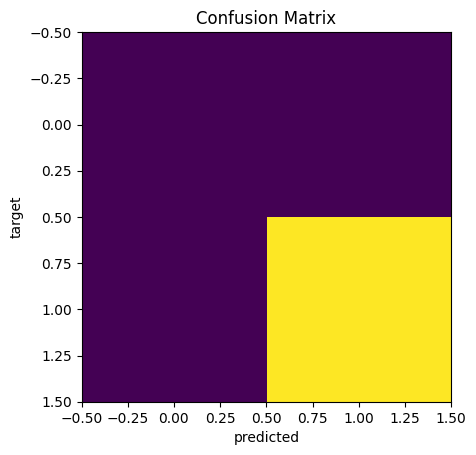

In [25]:
plt.xlabel("predicted")
plt.ylabel("target")
plt.title("Confusion Matrix")
plt.imshow(cm)

<Axes: >

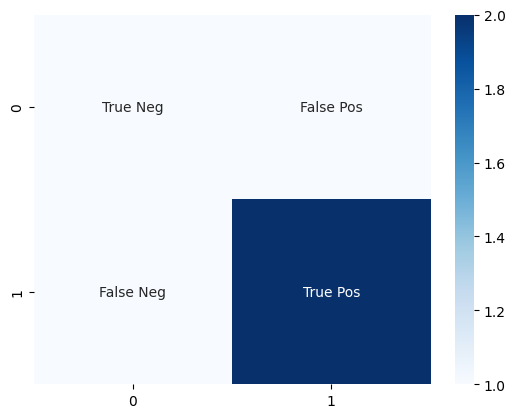

In [26]:
import seaborn as sns
labels = ["True Neg","False Pos","False Neg","True Pos"]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cm,annot=labels, fmt="", cmap='Blues')

In [27]:
from sklearn.metrics import classification_report

In [28]:
report1 = classification_report(y_pred, test_y)

In [29]:
print(report1)

              precision    recall  f1-score   support

          no       0.50      0.50      0.50         2
         yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



In [30]:
report2 = classification_report(test_y, y_pred)

In [31]:
print(report2)

              precision    recall  f1-score   support

          no       0.50      0.50      0.50         2
         yes       0.67      0.67      0.67         3

    accuracy                           0.60         5
   macro avg       0.58      0.58      0.58         5
weighted avg       0.60      0.60      0.60         5



[Text(0.4, 0.875, 'x[6] <= 0.5\nentropy = 0.918\nsamples = 9\nvalue = [3, 6]'),
 Text(0.2, 0.625, 'entropy = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6, 0.625, 'x[2] <= 0.5\nentropy = 0.971\nsamples = 5\nvalue = [3, 2]'),
 Text(0.4, 0.375, 'x[9] <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 2]'),
 Text(0.2, 0.125, 'entropy = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(0.6, 0.125, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.8, 0.375, 'entropy = 0.0\nsamples = 2\nvalue = [2, 0]')]

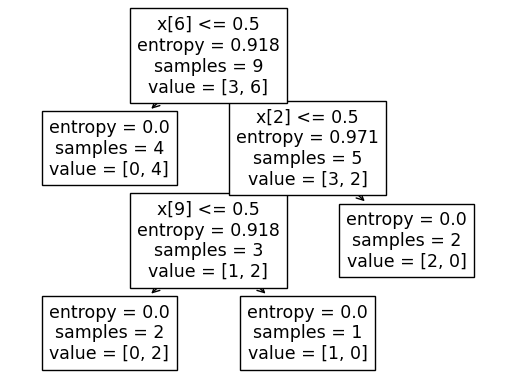

In [32]:
from sklearn import tree
tree.plot_tree(classifier)